# Example Usage

In [1]:
import chalc as ch
import numpy as np
import matplotlib.pyplot as plt
import h5py

For our data we sample 100 points on a circle with some noise and 100 points from inside the unit disk.

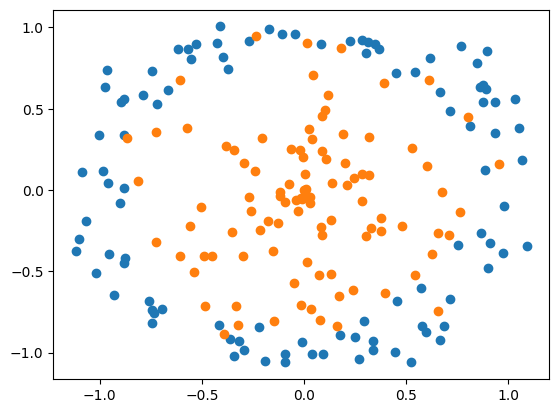

In [2]:
np.random.seed(40)
num_points = 100
mean = [0, 0]
cov = np.eye(2)*0.01
x = np.array([[np.sin(2*np.pi*t), np.cos(2*np.pi*t)] for t in np.random.rand(num_points)]).T +\
    np.random.default_rng().multivariate_normal(mean, cov, num_points).T # points as columns
y = np.random.rand(num_points) * np.array([[np.sin(2*np.pi*t), np.cos(2*np.pi*t)] for t in np.random.rand(num_points)]).T
plt.scatter(x[0, :], x[1, :])
plt.scatter(y[0, :], y[1, :])

We compute the chromatic alpha complex of the point cloud:

In [11]:
colours = [0]*100 + [1]*100
points = np.concatenate((x,y), axis=1)
K = ch.chromatic.alpha(points, colours)

$K$ has far fewer simplices than either the Cech or Vietoris-Rips complex, which each have $\displaystyle \binom{200}{2} = 19900$ edges and $\displaystyle \binom{200}{3} = 1313400$ 2-simplices. 

In [12]:
print(f'{len(K.simplices[1])} 1-simplices')
print(f'{len(K.simplices[2])} 2-simplices')

954 1-simplices
1312 2-simplices


Washboard server:

c:\Users\Abhinav\miniforge3\envs\Chalc\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Abhinav\miniforge3\envs\Chalc\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Abhinav\miniforge3\envs\Chalc\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Abhinav\miniforge3\envs\Chalc\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(d

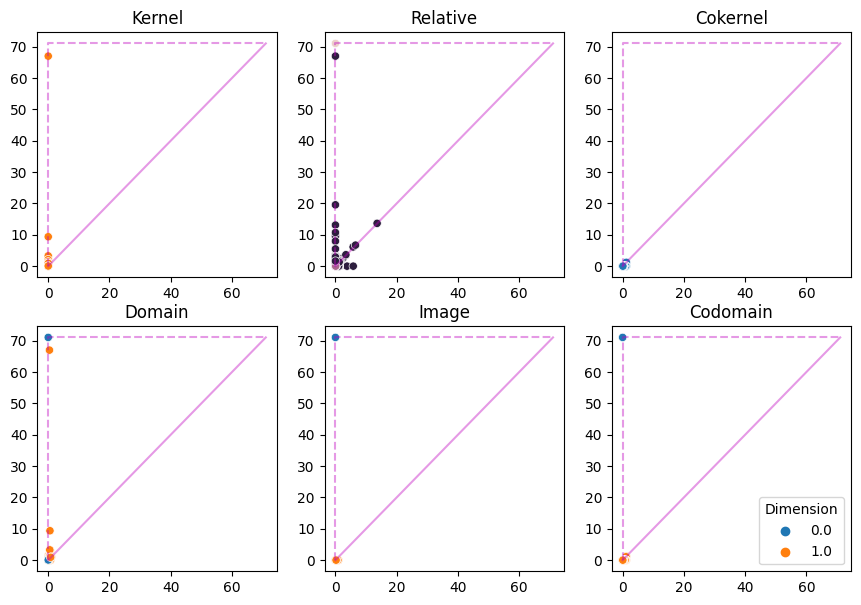

In [21]:
dgms = ch.sixpack.compute(points, colours, dom=[0,], method="chromatic alpha")
truncation =  max(dgms.entrance_times) * 1.01
fig = ch.sixpack.plot_sixpack(dgms, truncation, max_diagram_dim=1)

In [6]:
with h5py.File("test.h5", 'w') as f:
    ch.sixpack._types.save_diagrams(dgms, f)

In [7]:
dgms.ker.pair_matrix()

array([[1641, 2301],
       [1869, 2308],
       [2088, 2258],
       [1745, 2294],
       [1217, 2455],
       [ 531,  761],
       [1942, 2277],
       [1855, 2217],
       [1666, 2296],
       [1424, 2244],
       [2027, 2192],
       [1980, 2361],
       [1861, 2233],
       [1960, 2321],
       [ 387,  743],
       [2098, 2307],
       [ 407,  810],
       [1878, 2432],
       [1978, 2226],
       [1779, 2209],
       [ 379,  757],
       [ 393,  811],
       [1956, 2177],
       [1971, 2315],
       [ 680,  779],
       [2151, 2465],
       [ 538,  814],
       [ 436,  891],
       [1984, 2297],
       [ 586,  808],
       [2084, 2210],
       [1379, 2430],
       [1977, 2181],
       [1725, 2268],
       [1727, 2265],
       [1733, 2196],
       [2008, 2190],
       [1965, 2228],
       [1665, 2299],
       [2047, 2364],
       [ 430,  887],
       [2087, 2263],
       [2016, 2221],
       [1846, 2231],
       [1684, 2202],
       [1539, 2376],
       [1591, 2249],
       [1853,